# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
pprint(cities)

['kingaroy',
 'biltine',
 'nizhniy kuranakh',
 'klyuchi',
 'homer',
 'butaritari',
 'hilo',
 'yellowknife',
 'nanortalik',
 'hithadhoo',
 'kapaa',
 'cidreira',
 'fevralsk',
 'nikolskoye',
 'barentsburg',
 'sentyabrskiy',
 'idlib',
 'bereda',
 'rocha',
 'chicama',
 'albany',
 'muisne',
 'atuona',
 'bredasdorp',
 'vaini',
 'lebu',
 'bluff',
 'veraval',
 'sarangani',
 'kaitangata',
 'bethel',
 'zhanaozen',
 'lagoa',
 'bolungarvik',
 'kruisfontein',
 'punta arenas',
 'saint anthony',
 'ushuaia',
 'ajaccio',
 'azul',
 'sarabia',
 'mys shmidta',
 'cape town',
 'avarua',
 'port alfred',
 'mahebourg',
 'rikitea',
 'harper',
 'sept-iles',
 'anchorage',
 'busselton',
 'lumphat',
 'mezen',
 'vostok',
 'belushya guba',
 'katsuura',
 'east london',
 'umzimvubu',
 'hobart',
 'dzaoudzi',
 'stornoway',
 'mount gambier',
 'pevek',
 'bintulu',
 'nizhneyansk',
 'dolbeau',
 'banda aceh',
 'phan rang',
 'lashio',
 'norman wells',
 'guangzhou',
 'chunskiy',
 'ribeira grande',
 'skjervoy',
 'kysyl-syr',
 'so

In [3]:
# Create empty lists to store weather data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
get_date = []
city_id = []
city_name = []

In [7]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# Get weather data
for city in cities:
    response = requests.get(query_url + city)
    
weather_json = response.json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 15},
 'cod': 200,
 'coord': {'lat': 13.3, 'lon': -4.9},
 'dt': 1604363320,
 'id': 2451778,
 'main': {'feels_like': 72.32,
          'grnd_level': 979,
          'humidity': 20,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 78.26,
          'temp_max': 78.26,
          'temp_min': 78.26},
 'name': 'San',
 'sys': {'country': 'ML', 'sunrise': 1604384059, 'sunset': 1604425916},
 'timezone': 0,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 78, 'speed': 4.7}}


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kingaroy 2161376
Processing Record 2 of Set 1 | biltine 244878
Processing Record 3 of Set 1 | nizhniy kuranakh 2019135
Processing Record 4 of Set 1 | klyuchi 1503153
Processing Record 5 of Set 1 | homer 5864145
Processing Record 6 of Set 1 | butaritari 2110227
Processing Record 7 of Set 1 | hilo 5855927
Processing Record 8 of Set 1 | yellowknife 6185377
Processing Record 9 of Set 1 | nanortalik 3421765
Processing Record 10 of Set 1 | hithadhoo 1282256
Processing Record 11 of Set 1 | kapaa 5848280
Processing Record 12 of Set 1 | cidreira 3466165
City not found. Skipping.....
Processing Record 13 of Set 1 | nikolskoye 546105
City not found. Skipping.....
City not found. Skipping.....
Processing Record 14 of Set 1 | idlib 169389
Processing Record 15 of Set 1 | bereda 3105522
Processing Record 16 of Set 1 | rocha 3440777
Processing Record 17 of Set 1 | chicama 3698359
Processing Record 18 of Set 1 | alban

Processing Record 5 of Set 4 | arraial do cabo 3471451
Processing Record 6 of Set 4 | barrow 5880054
Processing Record 7 of Set 4 | hualmay 3939761
Processing Record 8 of Set 4 | kodiak 5866583
Processing Record 9 of Set 4 | batagay 2027044
Processing Record 10 of Set 4 | luwuk 1637001
Processing Record 11 of Set 4 | luderitz 3355672
Processing Record 12 of Set 4 | kimbe 2093967
Processing Record 13 of Set 4 | solnechnyy 2016307
Processing Record 14 of Set 4 | kavieng 2094342
Processing Record 15 of Set 4 | gao 2457161
Processing Record 16 of Set 4 | korla 1529376
Processing Record 17 of Set 4 | roald 3141667
Processing Record 18 of Set 4 | godalming 2648372
Processing Record 19 of Set 4 | mangrol 1263752
Processing Record 20 of Set 4 | majenang 1636808
Processing Record 21 of Set 4 | cabo san lucas 3985710
City not found. Skipping.....
Processing Record 22 of Set 4 | mount isa 2065594
City not found. Skipping.....
Processing Record 23 of Set 4 | dikson 1507390
City not found. Skipping

Processing Record 8 of Set 7 | swellendam 950709
Processing Record 9 of Set 7 | mandera 187896
Processing Record 10 of Set 7 | liverpool 2644210
Processing Record 11 of Set 7 | dezhou 1812955
Processing Record 12 of Set 7 | moose factory 6078372
Processing Record 13 of Set 7 | nata 3703938
Processing Record 14 of Set 7 | colti 681047
Processing Record 15 of Set 7 | urussu 478565
Processing Record 16 of Set 7 | placerville 5383559
Processing Record 17 of Set 7 | godfrey 4239509
Processing Record 18 of Set 7 | townsville 2146142
Processing Record 19 of Set 7 | newtownards 2641519
Processing Record 20 of Set 7 | sitka 5557293
Processing Record 21 of Set 7 | murray bridge 2065176
Processing Record 22 of Set 7 | baherden 162158
Processing Record 23 of Set 7 | reading 2639577
Processing Record 24 of Set 7 | hisai 1862389
Processing Record 25 of Set 7 | greytown 1000006
Processing Record 26 of Set 7 | dubbo 2168305
Processing Record 27 of Set 7 | goderich 5962442
Processing Record 28 of Set 7

Processing Record 19 of Set 10 | bundaberg 2173323
Processing Record 20 of Set 10 | bukoba 160961
Processing Record 21 of Set 10 | taitung 6949678
City not found. Skipping.....
Processing Record 22 of Set 10 | malko tarnovo 729322
Processing Record 23 of Set 10 | bobrov 575948
Processing Record 24 of Set 10 | dharchula 1272864
Processing Record 25 of Set 10 | alofi 4036284
Processing Record 26 of Set 10 | balkanabat 161616
Processing Record 27 of Set 10 | ban dung 1619650
Processing Record 28 of Set 10 | xuanhua 2033574
City not found. Skipping.....
City not found. Skipping.....
Processing Record 29 of Set 10 | jadu 2216432
Processing Record 30 of Set 10 | nuuk 3421319
City not found. Skipping.....
Processing Record 31 of Set 10 | seoul 1835848
Processing Record 32 of Set 10 | bjerkvik 3161456
Processing Record 33 of Set 10 | rio gallegos 3838859
Processing Record 34 of Set 10 | wajid 50814
Processing Record 35 of Set 10 | ijui 3461444
Processing Record 36 of Set 10 | vestmanna 2610343

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Create empty lists to store weather data
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
get_date = []
city_id = []
city_name = []


print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 0
set_count = 1

for index, city in enumerate(cities):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append (response['coord']['lat'])
        lng.append (response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        get_date.append(response['dt'])
        curr_city_id=response['id']
        city_id.append(curr_city_id)
        
        if record_count > 49:
            record_count = 0
            set_count = set_count + 1

        else:
            record_count = record_count + 1

        print(f"Processing Record {record_count} of Set {set_count} | {city} {curr_city_id}")

    
    except (KeyError):
        print(f"City not found. Skipping.....")
#     break

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kingaroy 2161376
Processing Record 2 of Set 1 | biltine 244878
Processing Record 3 of Set 1 | nizhniy kuranakh 2019135
Processing Record 4 of Set 1 | klyuchi 1503153
Processing Record 5 of Set 1 | homer 5864145
Processing Record 6 of Set 1 | butaritari 2110227
Processing Record 7 of Set 1 | hilo 5855927
Processing Record 8 of Set 1 | yellowknife 6185377
Processing Record 9 of Set 1 | nanortalik 3421765
Processing Record 10 of Set 1 | hithadhoo 1282256
Processing Record 11 of Set 1 | kapaa 5848280
Processing Record 12 of Set 1 | cidreira 3466165
City not found. Skipping.....
Processing Record 13 of Set 1 | nikolskoye 546105
City not found. Skipping.....
City not found. Skipping.....
Processing Record 14 of Set 1 | idlib 169389
Processing Record 15 of Set 1 | bereda 3105522
Processing Record 16 of Set 1 | rocha 3440777
Processing Record 17 of Set 1 | chicama 3698359
Processing Record 18 of Set 1 | alban

Processing Record 6 of Set 4 | barrow 5880054
Processing Record 7 of Set 4 | hualmay 3939761
Processing Record 8 of Set 4 | kodiak 5866583
Processing Record 9 of Set 4 | batagay 2027044
Processing Record 10 of Set 4 | luwuk 1637001
Processing Record 11 of Set 4 | luderitz 3355672
Processing Record 12 of Set 4 | kimbe 2093967
Processing Record 13 of Set 4 | solnechnyy 2016307
Processing Record 14 of Set 4 | kavieng 2094342
Processing Record 15 of Set 4 | gao 2457161
Processing Record 16 of Set 4 | korla 1529376
Processing Record 17 of Set 4 | roald 3141667
Processing Record 18 of Set 4 | godalming 2648372
Processing Record 19 of Set 4 | mangrol 1263752
Processing Record 20 of Set 4 | majenang 1636808
Processing Record 21 of Set 4 | cabo san lucas 3985710
City not found. Skipping.....
Processing Record 22 of Set 4 | mount isa 2065594
City not found. Skipping.....
Processing Record 23 of Set 4 | dikson 1507390
City not found. Skipping.....
Processing Record 24 of Set 4 | castro 3466704
Pr

Processing Record 8 of Set 7 | swellendam 950709
Processing Record 9 of Set 7 | mandera 187896
Processing Record 10 of Set 7 | liverpool 2644210
Processing Record 11 of Set 7 | dezhou 1812955
Processing Record 12 of Set 7 | moose factory 6078372
Processing Record 13 of Set 7 | nata 3703938
Processing Record 14 of Set 7 | colti 681047
Processing Record 15 of Set 7 | urussu 478565
Processing Record 16 of Set 7 | placerville 5383559
Processing Record 17 of Set 7 | godfrey 4239509
Processing Record 18 of Set 7 | townsville 2146142
Processing Record 19 of Set 7 | newtownards 2641519
Processing Record 20 of Set 7 | sitka 5557293
Processing Record 21 of Set 7 | murray bridge 2065176
Processing Record 22 of Set 7 | baherden 162158
Processing Record 23 of Set 7 | reading 2639577
Processing Record 24 of Set 7 | hisai 1862389
Processing Record 25 of Set 7 | greytown 1000006
Processing Record 26 of Set 7 | dubbo 2168305
Processing Record 27 of Set 7 | goderich 5962442
Processing Record 28 of Set 7

Processing Record 19 of Set 10 | bundaberg 2173323
Processing Record 20 of Set 10 | bukoba 160961
Processing Record 21 of Set 10 | taitung 6949678
City not found. Skipping.....
Processing Record 22 of Set 10 | malko tarnovo 729322
Processing Record 23 of Set 10 | bobrov 575948
Processing Record 24 of Set 10 | dharchula 1272864
Processing Record 25 of Set 10 | alofi 4036284
Processing Record 26 of Set 10 | balkanabat 161616
Processing Record 27 of Set 10 | ban dung 1619650
Processing Record 28 of Set 10 | xuanhua 2033574
City not found. Skipping.....
City not found. Skipping.....
Processing Record 29 of Set 10 | jadu 2216432
Processing Record 30 of Set 10 | nuuk 3421319
City not found. Skipping.....
Processing Record 31 of Set 10 | seoul 1835848
Processing Record 32 of Set 10 | bjerkvik 3161456
Processing Record 33 of Set 10 | rio gallegos 3838859
Processing Record 34 of Set 10 | wajid 50814
Processing Record 35 of Set 10 | ijui 3461444
Processing Record 36 of Set 10 | vestmanna 2610343

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
weather_data = pd.DataFrame({"City": city_name, 
                             "Lat": lat, 
                             "Lng": lng, 
                             "Max Temp": max_temp, 
                             "Humidity": humidity, 
                             "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": get_date
                            })
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kingaroy,-26.53,151.83,82.00,47,40,5.82,AU,1604370478
1,Biltine,14.53,20.92,81.57,23,75,20.69,TD,1604370478
2,Nizhniy Kuranakh,58.84,125.49,-3.32,87,0,0.98,RU,1604370478
3,Klyuchi,52.27,79.17,28.99,94,44,5.48,RU,1604370478
4,Homer,59.64,-151.55,27.00,23,75,4.70,US,1604370479
...,...,...,...,...,...,...,...,...,...
595,City of San Pedro,14.35,121.02,90.00,66,20,5.82,PH,1604370628
596,Mehamn,71.04,27.85,43.23,86,61,21.77,NO,1604370628
597,Talcahuano,-36.72,-73.12,55.40,87,90,6.93,CL,1604370628
598,That Phanom,16.94,104.71,82.00,69,20,4.70,TH,1604370628


In [13]:
weather_data.to_csv("output_data/cities.csv", index=False)

In [14]:
weather_data.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [15]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02
mean,21.556583,25.143900,56.225033,71.883333,52.088333,8.670767,1.604371e+09
std,33.611897,90.962726,22.855163,21.210836,41.734680,6.799708,7.739277e+01
min,-54.800000,-175.200000,-13.090000,10.000000,0.000000,0.200000,1.604370e+09
25%,-5.700000,-52.817500,42.160000,60.000000,2.750000,4.022500,1.604371e+09
50%,27.975000,26.545000,60.180000,76.500000,61.500000,6.930000,1.604371e+09
75%,50.795000,106.822500,75.262500,88.000000,96.250000,11.410000,1.604371e+09
max,78.220000,179.320000,98.600000,100.000000,100.000000,48.320000,1.604371e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

clean_city_data = weather_data.drop(weather_data[weather_data['Humidity'] > 100].index, inplace = False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kingaroy,-26.53,151.83,82.00,47,40,5.82,AU,1604370478
1,Biltine,14.53,20.92,81.57,23,75,20.69,TD,1604370478
2,Nizhniy Kuranakh,58.84,125.49,-3.32,87,0,0.98,RU,1604370478
3,Klyuchi,52.27,79.17,28.99,94,44,5.48,RU,1604370478
4,Homer,59.64,-151.55,27.00,23,75,4.70,US,1604370479
...,...,...,...,...,...,...,...,...,...
595,City of San Pedro,14.35,121.02,90.00,66,20,5.82,PH,1604370628
596,Mehamn,71.04,27.85,43.23,86,61,21.77,NO,1604370628
597,Talcahuano,-36.72,-73.12,55.40,87,90,6.93,CL,1604370628
598,That Phanom,16.94,104.71,82.00,69,20,4.70,TH,1604370628


In [17]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [18]:

clean_city_data['Max Temp']

0      82.00
1      81.57
2      -3.32
3      28.99
4      27.00
       ...  
595    90.00
596    43.23
597    55.40
598    82.00
599    75.18
Name: Max Temp, Length: 600, dtype: float64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

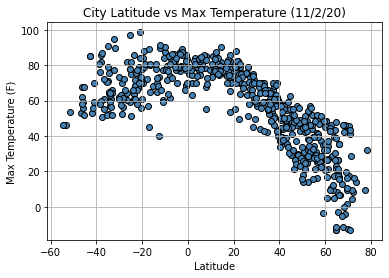

In [19]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Max Temperature (11/2/20)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Temp vs Latitude.png")
plt.show()

## Latitude vs. Humidity Plot

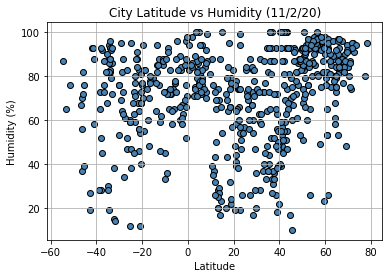

In [20]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Humidity (11/2/20)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Humidity vs Latitude.png")
plt.show()

## Latitude vs. Cloudiness Plot

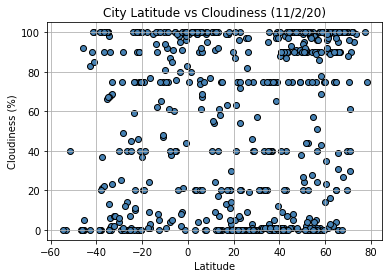

In [21]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Cloudiness (11/2/20)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Cloudiness vs Latitude.png")
plt.show()

## Latitude vs. Wind Speed Plot

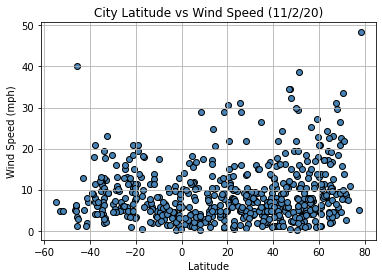

In [22]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker='o', color= 'steelblue', edgecolor="black")
plt.grid()
plt.title("City Latitude vs Wind Speed (11/2/20)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

plt.savefig("../Graphs/Wind Speed vs Latitude.png")
plt.show()

## Linear Regression

In [23]:
south_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]
north_hemisphere = clean_city_data[clean_city_data["Lat"] > 0]
south_hemisphere.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kingaroy,-26.53,151.83,82.00,47,40,5.82,AU,1604370478
9,Hithadhoo,-0.60,73.08,83.25,71,100,7.96,MV,1604370480
11,Cidreira,-30.18,-50.21,62.20,76,4,6.55,BR,1604370480
15,Rocha,-34.48,-54.33,52.47,94,0,4.05,UY,1604370266
16,Chicama,-7.84,-79.15,61.43,83,87,5.06,PE,1604370482


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.7535429169921014


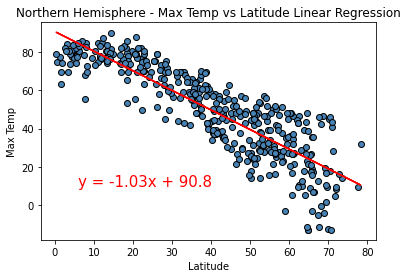

In [24]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# plt.savefig("Graphs/Linregress Northern Hem - Temp vs Lat.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.222787731891594


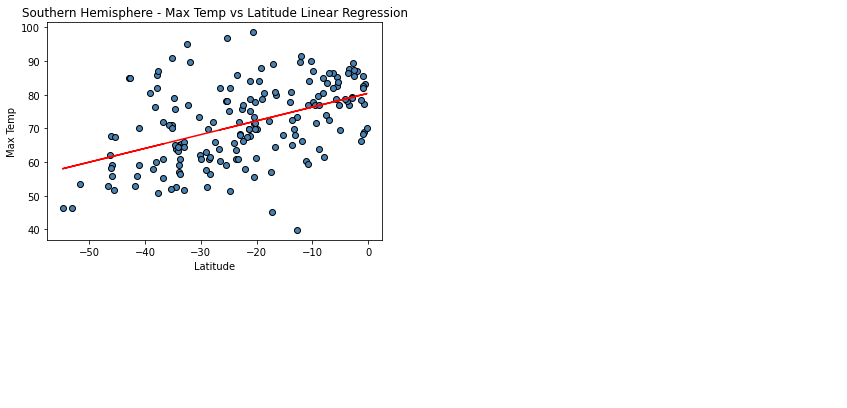

In [26]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# plt.savefig("Graphs/Linregress Southern Hem - Temp vs Lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.1026744660983612


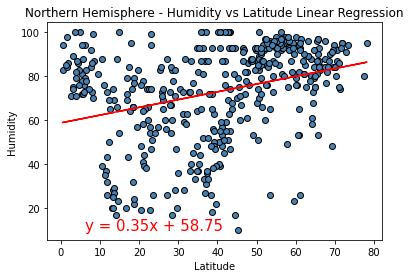

In [27]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# plt.savefig("Graphs/Linregress Northern Hem - Humidity vs Lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared value is: 0.021576253910724097


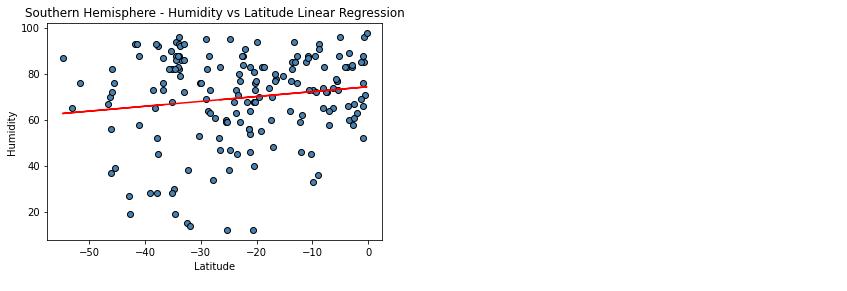

In [28]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Humidity vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# plt.savefig("Graphs/Linregress Southern Hem - Humidity vs Lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.0266093305015314


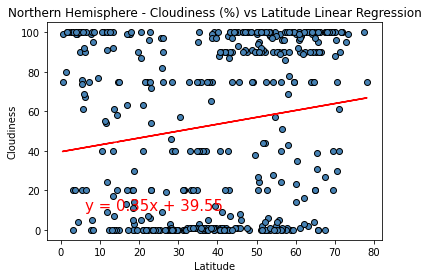

In [29]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# plt.savefig("Graphs/Linregress Northern Hem - Cloudiness vs Lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared value is: 0.09831877746533617


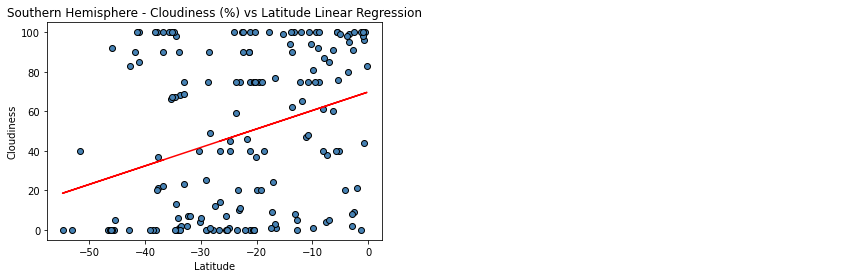

In [30]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# plt.savefig("Graphs/Linregress Southern Hem - Cloudiness vs Lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.028358066937692647


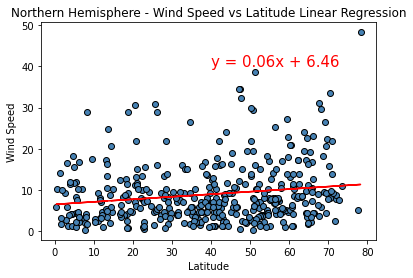

In [31]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# plt.savefig("Graphs/Linregress Northern Hem - Wind Speed vs Lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared value is: 0.03848887950197441


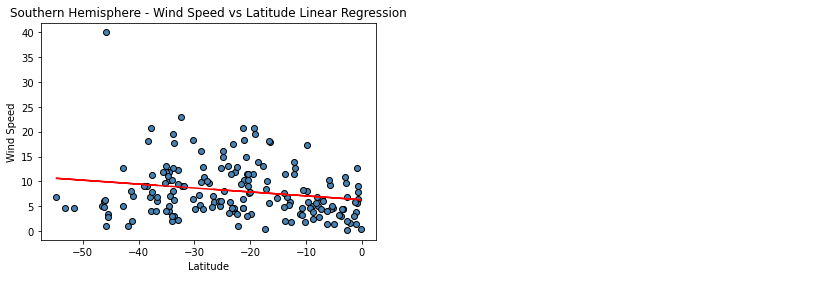

In [32]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared value is: {rvalue**2}")

# Using scatter plot, show linear regression line
plt.scatter(x_values,y_values, color= "steelblue", edgecolor= "black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,-10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# plt.savefig("Graphs/Linregress Southern Hem - Wind Speed vs Lat.png")
plt.show()